Importing Libraries

In [505]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


Initialising Data

In [506]:
data =  pd.read_csv('./Data/basetable.csv')

In [507]:
data.drop('Unnamed: 0', inplace = True, axis = 1)
data.drop('client_id', inplace = True, axis = 1)
data.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,job_admin.,...,age-group_80-90,age-group_90-100,campaign_missing,pdays_missing,previous_missing,emp.var.rate_missing,cons.price.idx_missing,cons.conf.idx_missing,euribor3m_missing,nr.employed_missing
0,1.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,999.0,0.0,1.4,94.465,-41.8,4.960,5228.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,999.0,0.0,-1.8,92.893,-46.2,1.264,5099.1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,999.0,0.0,-1.8,93.075,-47.1,1.453,5099.1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [508]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   campaign                       20000 non-null  float64
 1   pdays                          20000 non-null  float64
 2   previous                       20000 non-null  float64
 3   emp.var.rate                   20000 non-null  float64
 4   cons.price.idx                 20000 non-null  float64
 5   cons.conf.idx                  20000 non-null  float64
 6   euribor3m                      20000 non-null  float64
 7   nr.employed                    20000 non-null  float64
 8   subscribe                      20000 non-null  int64  
 9   job_admin.                     20000 non-null  int64  
 10  job_blue-collar                20000 non-null  int64  
 11  job_entrepreneur               20000 non-null  int64  
 12  job_housemaid                  20000 non-null 

In [509]:
y = data['subscribe']
X = data.drop('subscribe', axis = 1)
print(X.shape)
print(y.shape)

(20000, 82)
(20000,)


# Model Evaluation

In [510]:
dtree = DecisionTreeClassifier(max_leaf_nodes=15, random_state=42)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  test_size=0.3, random_state=42)

dtree.fit(X_train, y_train)

# predict probabilities
pred_train = dtree.predict_proba(X_train)
pred_test = dtree.predict_proba(X_test)


In [511]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8321428571428572, 'Acc_test': 0.8243333333333334}}

In [512]:
print(roc_auc_score(y_train, dtree.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1]))

0.7742741955919096
0.7717759650867874


[Text(0.4875, 0.9166666666666666, 'X[7] <= 5087.65\ngini = 0.201\nsamples = 14000\nvalue = [12410, 1590]'),
 Text(0.25, 0.75, 'X[63] <= 0.5\ngini = 0.49\nsamples = 1782\nvalue = [1016, 766]'),
 Text(0.15, 0.5833333333333334, 'X[81] <= 0.5\ngini = 0.45\nsamples = 1388\nvalue = [914, 474]'),
 Text(0.1, 0.4166666666666667, 'X[6] <= 0.715\ngini = 0.465\nsamples = 1274\nvalue = [805, 469]'),
 Text(0.05, 0.25, 'gini = 0.498\nsamples = 234\nvalue = [124, 110]'),
 Text(0.15, 0.25, 'X[41] <= 0.5\ngini = 0.452\nsamples = 1040\nvalue = [681, 359]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.362\nsamples = 177\nvalue = [135, 42]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.465\nsamples = 863\nvalue = [546, 317]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.084\nsamples = 114\nvalue = [109, 5]'),
 Text(0.35, 0.5833333333333334, 'X[56] <= 0.5\ngini = 0.384\nsamples = 394\nvalue = [102, 292]'),
 Text(0.3, 0.4166666666666667, 'gini = 0.324\nsamples = 310\nvalue = [63, 247]'),
 Text(0.4, 0.41666666666666

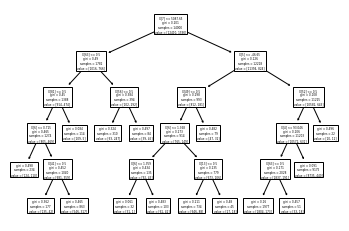

In [513]:
from sklearn import tree

tree.plot_tree(dtree)

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


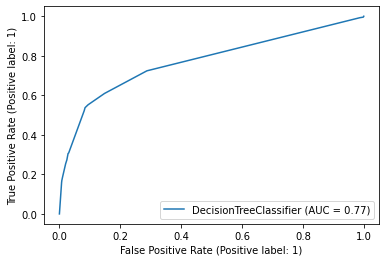

In [514]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(dtree, X_test, y_test)
plt.show()

In [515]:
y_test.value_counts()

0    5319
1     681
Name: subscribe, dtype: int64

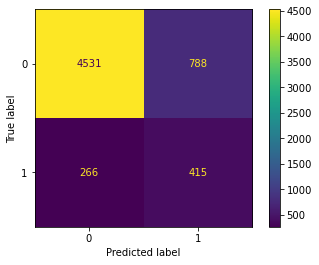

In [516]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [517]:
from sklearn.model_selection import cross_validate

dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
cv_results = cross_validate(dtree, X, y, cv=5)
cv_results['test_score']

array([0.89825, 0.899  , 0.898  , 0.8985 , 0.9    ])

In [518]:
forward_selection_features = ['job_student', 'marital_single', 'default_no' ,  'contact_telephone', 'month_apr',  'month_dec',  'month_jun',  'month_mar' , 'month_oct' , 'month_sep', 'day_of_week_mon',  'poutcome_success',  'age-group_60-70' , 'age-group_70-80',  'age-group_80-90']

backward_selection_features = ['pdays', 'cons.conf.idx', 'nr.employed', 'job_blue-collar','contact_telephone', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'day_of_week_mon', 'poutcome_nonexistent', 'poutcome_success', 'pdays_missing', 'cons.conf.idx_missing', 'nr.employed_missing']

In [519]:
dtree = DecisionTreeClassifier(max_depth=8, random_state=42)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,forward_selection_features], y, stratify=y, test_size=0.3, random_state=42)

dtree.fit(X_train, y_train)

# predict probabilities
pred_train = dtree.predict_proba(X_train)
pred_test = dtree.predict_proba(X_test)

In [520]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8840714285714286, 'Acc_test': 0.8756666666666667}}

In [521]:
print(roc_auc_score(y_train, dtree.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1]))

0.7299462545421374
0.7264778773570711


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


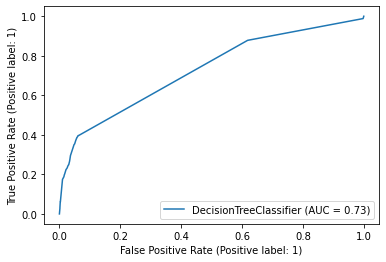

In [522]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(dtree, X_test, y_test)
plt.show()

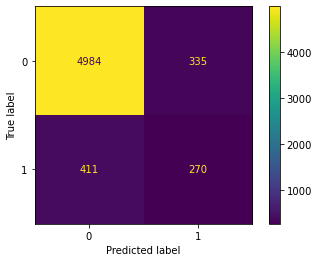

In [523]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [524]:
dtree = DecisionTreeClassifier(max_depth=8, random_state=42)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,backward_selection_features], y, stratify=y,  test_size=0.3, random_state=42)

dtree.fit(X_train, y_train)

# predict probabilities
pred_train = dtree.predict_proba(X_train)
pred_test = dtree.predict_proba(X_test)

In [525]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8462142857142857, 'Acc_test': 0.8336666666666667}}

In [526]:
print(roc_auc_score(y_train, dtree.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1]))

0.8028398684363898
0.7912363043962588


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


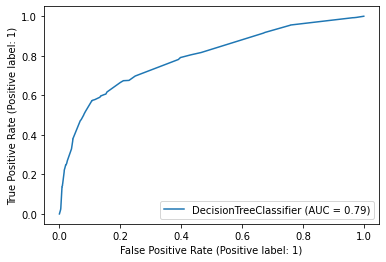

In [527]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(dtree, X_test, y_test)
plt.show()

In [528]:
from sklearn.preprocessing import StandardScaler

dtree = DecisionTreeClassifier(max_depth=8, random_state=42)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, stratify=y,  test_size=0.3, random_state=42)

dtree.fit(X_train, y_train)

# predict probabilities
pred_train = dtree.predict_proba(X_train)
pred_test = dtree.predict_proba(X_test)

In [529]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8657142857142858, 'Acc_test': 0.8473333333333334}}

In [530]:
print(roc_auc_score(y_train, dtree.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1]))

0.8129896259356676
0.7662770181647318


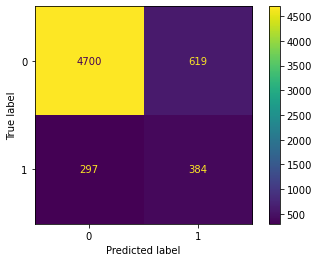

In [531]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [532]:
X_norm = pd.DataFrame()
for col in X.columns:
    X_norm[col] = X[col].map(lambda x: (x - np.mean(X[col]))/ np.std(X[col]))

In [533]:
from sklearn.preprocessing import StandardScaler

dtree = DecisionTreeClassifier(max_depth=8, random_state=42)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y,  test_size=0.3, random_state=42)

dtree.fit(X_train, y_train)

# predict probabilities
pred_train = dtree.predict_proba(X_train)
pred_test = dtree.predict_proba(X_test)

In [534]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8657142857142858, 'Acc_test': 0.8473333333333334}}

In [535]:
print(roc_auc_score(y_train, dtree.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1]))

0.8129896259356676
0.7662770181647318


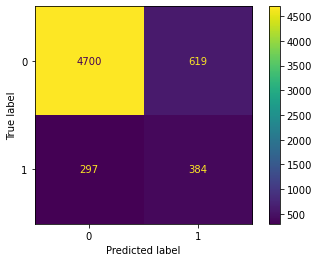

In [536]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()